In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190525, 190518, 190511, 190504]
df = get_data(week_nums)

In [3]:
#df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200627.txt', header = 0)

In [3]:
df.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [4]:
df['Date_Time'] = df['DATE'] + ' ' + df['TIME']

In [5]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [6]:
df = df[df['DESC'] == 'REGULAR']

In [7]:
## gets the count of entries and exits by using max counter - min counter per day per turnstile
mta_entries = df.groupby(['STATION','C/A','UNIT','SCP','DATE']).ENTRIES.max() - df.groupby(['STATION','C/A','UNIT','SCP','DATE']).ENTRIES.min()
mta_exits = df.groupby(['STATION','C/A','UNIT','SCP','DATE']).EXITS.max() - df.groupby(['STATION','C/A','UNIT','SCP','DATE']).EXITS.min()

## resetting index of the data
mta_entries_flat = mta_entries.reset_index()
mta_exits_flat = mta_exits.reset_index()
mta_entries_exits = pd.merge(mta_entries_flat, mta_exits_flat, how='outer')

In [8]:
mta_entries_exits.ENTRIES.quantile(.9996)

293097.3400002322

In [9]:
mta_entries_exits.EXITS.quantile(.9996)

340128.840000798

In [10]:
mta_entries_exits['EXITS'].abs()

0          132
1          115
2         3362
3         3658
4         3585
          ... 
134946       0
134947       1
134948       0
134949       0
134950       0
Name: EXITS, Length: 134951, dtype: int64

In [11]:
mta_traffic = mta_entries_exits[(mta_entries_exits['ENTRIES']<10000) & (mta_entries_exits['EXITS']<10000) & (mta_entries_exits['ENTRIES'] > 1) & (mta_entries_exits['EXITS'] > 1)]


In [12]:
mta_traffic

,STATION,C/A,UNIT,SCP,DATE,ENTRIES,EXITS
2,1 AV,H007,R248,00-00-00,04/29/2019,3227,3362
3,1 AV,H007,R248,00-00-00,04/30/2019,3585,3658
4,1 AV,H007,R248,00-00-00,05/01/2019,3440,3585
5,1 AV,H007,R248,00-00-00,05/02/2019,4288,3279
6,1 AV,H007,R248,00-00-00,05/03/2019,3393,3710
...,...,...,...,...,...,...,...
134890,ZEREGA AV,R419,R326,00-03-01,05/20/2019,1187,181
134891,ZEREGA AV,R419,R326,00-03-01,05/21/2019,1280,223
134892,ZEREGA AV,R419,R326,00-03-01,05/22/2019,1265,200
134893,ZEREGA AV,R419,R326,00-03-01,05/23/2019,1229,172


In [13]:
mta_station_rank = mta_traffic.groupby(['STATION']).sum()

In [14]:
mta_rank = mta_station_rank.sort_values(by='ENTRIES', ascending = True).tail(20).reset_index()
mta_rank

,STATION,ENTRIES,EXITS
0,PATH NEW WTC,1162669,1085562
1,JKSN HT-ROOSVLT,1174578,778454
2,47-50 STS ROCK,1243351,1441104
3,FLUSHING-MAIN,1258999,957407
4,CHAMBERS ST,1295376,1148886
5,14 ST,1376142,1252287
6,59 ST,1434192,1336455
7,96 ST,1515570,1133195
8,59 ST COLUMBUS,1572569,1401918
9,CANAL ST,1676901,1408650


In [15]:
mta_rank['TotalTraf'] = mta_rank['ENTRIES'] + mta_rank['EXITS']
mta_final = mta_rank.sort_values(by = 'TotalTraf', ascending = True)

In [16]:
mta_rank.columns

Index(['STATION', 'ENTRIES', 'EXITS', 'TotalTraf'], dtype='object')

In [17]:
mta_final.columns

Index(['STATION', 'ENTRIES', 'EXITS', 'TotalTraf'], dtype='object')

<BarContainer object of 20 artists>

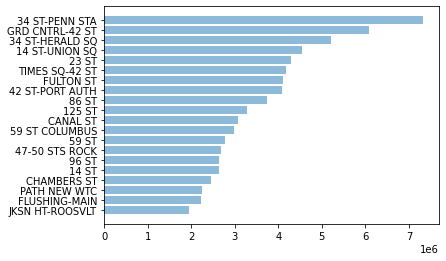

In [18]:
plt.barh(mta_final['STATION'],mta_final['TotalTraf'], alpha = 0.5)

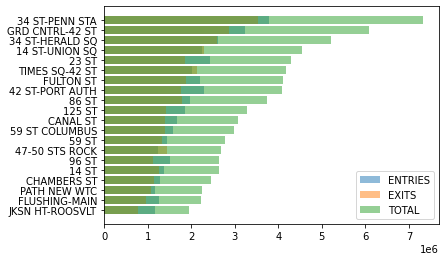

In [19]:
plt.barh(mta_final['STATION'],mta_final['ENTRIES'], alpha = 0.5)
plt.barh(mta_rank['STATION'],mta_rank['EXITS'], alpha = 0.5)
plt.barh(mta_rank['STATION'],mta_rank['TotalTraf'], alpha = 0.5)
plt.legend(['ENTRIES','EXITS','TOTAL']);

In [52]:
y_ticks = [station for station in mta_final['STATION']]
y_ticks
location = range(1,41,2)

In [44]:
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 20 # Number of sets of bars
w = .8 # Width of each bar
Entries = [t*element + w*n for element
             in range(d)]
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 20 # Number of sets of bars
w = .8 # Width of each bar
Exits = [t*element + w*n for element
             in range(d)]


''

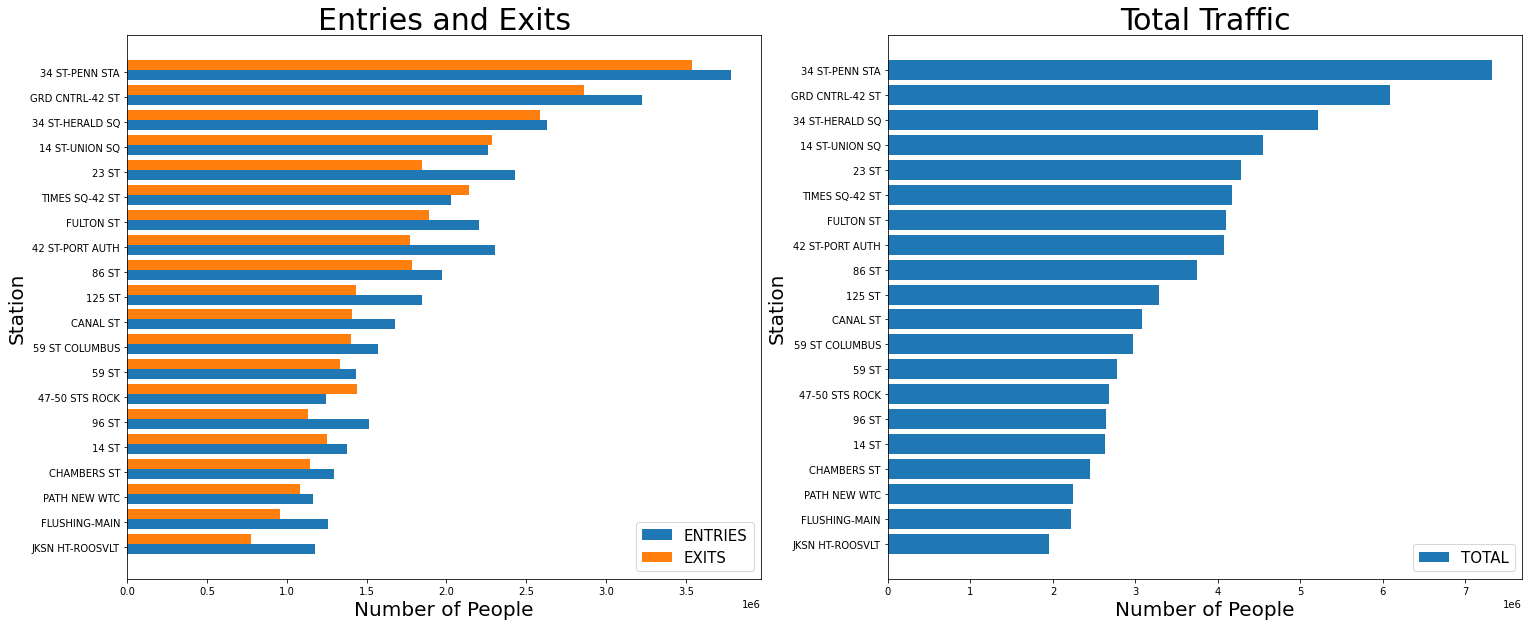

In [67]:
plt.figure(figsize = [25,10])
plt.subplot(1,2,1)
plt.barh(Entries,mta_final['ENTRIES'])
plt.barh(Exits,mta_final['EXITS'])
plt.yticks(location, y_ticks)
plt.legend(['ENTRIES','EXITS'], fontsize = 15)
plt.title('Entries and Exits', fontsize=30)
plt.xlabel('Number of People', fontsize=20)
plt.ylabel('Station', fontsize=20);
plt.subplot(1,2,2)
plt.barh(mta_final['STATION'],mta_final['TotalTraf'])
plt.legend(['TOTAL'], fontsize = 15)
plt.title('Total Traffic', fontsize=30)
plt.xlabel('Number of People', fontsize=20)
plt.ylabel('Station', fontsize=20);
;

In [22]:
mta_station_rank.sort_values(by='EXITS', ascending = False).head(20)

,ENTRIES,EXITS
STATION,,
34 ST-PENN STA,3782729,3538581
GRD CNTRL-42 ST,3224858,2863898
34 ST-HERALD SQ,2627237,2588666
14 ST-UNION SQ,2258780,2287816
TIMES SQ-42 ST,2026348,2143120
FULTON ST,2206935,1890170
23 ST,2431924,1850333
86 ST,1969557,1782394
42 ST-PORT AUTH,2305272,1773088


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

blocks = pd.read_csv('census_block_loc.csv')
census = pd.read_csv('datasets_1682_3159_nyc_census_tracts.csv',index_col=0)

In [24]:
blocks = blocks[blocks.County.isin(['Bronx','Kings','New York','Queens','Richmond'])]
blocks['Tract'] = blocks.BlockCode // 10000
blocks = blocks.merge(census,how='left',right_index=True,left_on='Tract')

In [25]:
blocks.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18053 entries, 15 to 37111
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         18053 non-null  float64
 1   Longitude        18053 non-null  float64
 2   BlockCode        18053 non-null  int64  
 3   County_x         18053 non-null  object 
 4   State            18053 non-null  object 
 5   Tract            18053 non-null  int64  
 6   County_y         18052 non-null  object 
 7   Borough          18052 non-null  object 
 8   TotalPop         18052 non-null  float64
 9   Men              18052 non-null  float64
 10  Women            18052 non-null  float64
 11  Hispanic         12999 non-null  float64
 12  White            12999 non-null  float64
 13  Black            12999 non-null  float64
 14  Native           12999 non-null  float64
 15  Asian            12999 non-null  float64
 16  Citizen          18052 non-null  float64
 17  Income     

In [26]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

def make_plot(blocks, data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(blocks.Latitude,blocks.Longitude,data_values)
    fig, ax = plt.subplots(figsize = [12,12])

    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
    
    im = ax.imshow(values.T,origin='lower',cmap=colors,extent=limits, zorder = 1)
    ax.autoscale(False)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)
    plt.show()

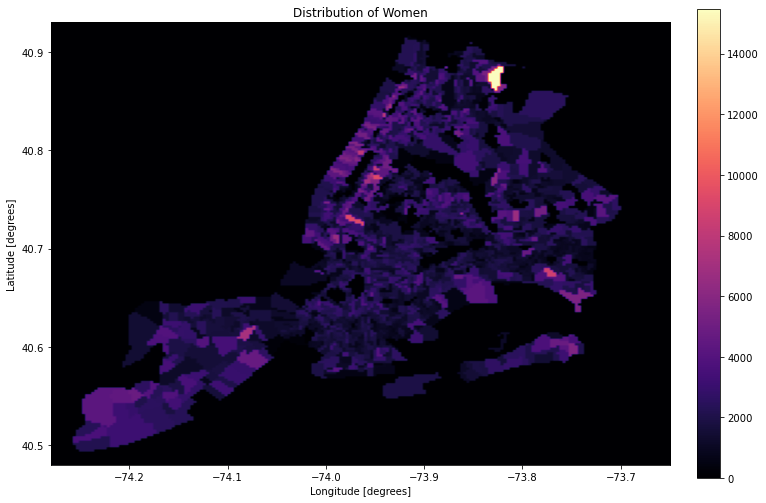

In [27]:
make_plot(blocks, blocks.Women,colors='magma',title='Distribution of Women')

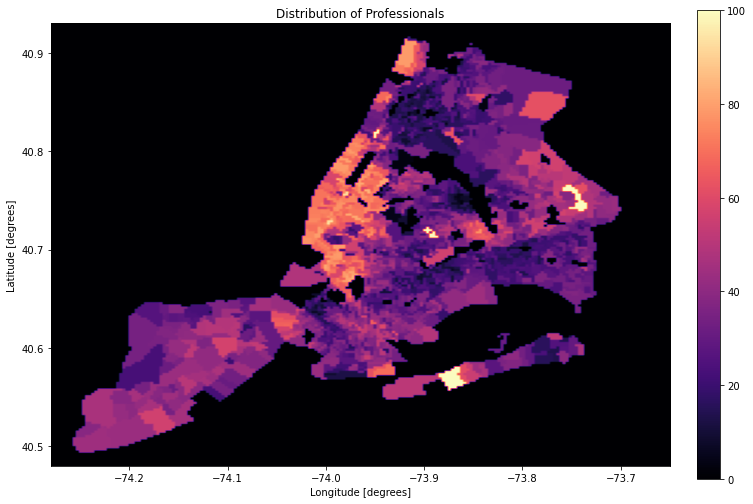

In [28]:
make_plot(blocks, blocks.Professional,colors='magma',title='Distribution of Professionals')

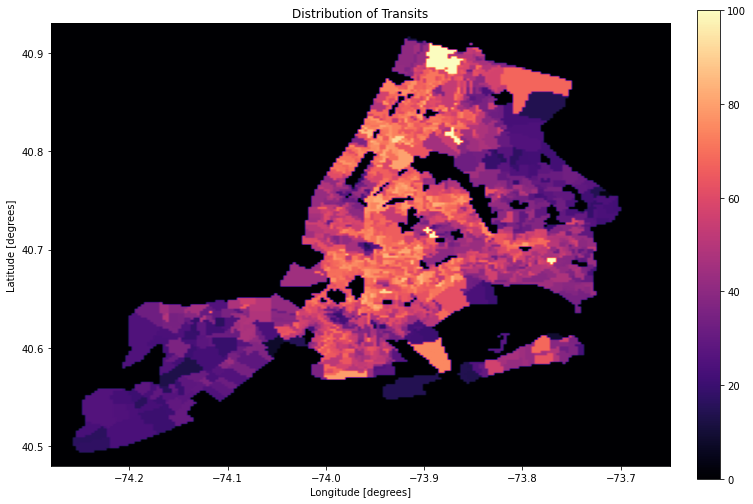

In [29]:
make_plot(blocks, blocks.Transit,colors='magma',title='Distribution of Transits')